# Data Preparation and Exploratory Data Analysis of Heart Disease Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
import seaborn as sns

## Data preparation and preliminary examination
This portion includes importation of data files, processing of missing values, quick glances at data in histograms, and consolidation into a single dataframe.

What I have initially questioned with the data available here is whether any of the variables obviously relate to presence and/or level of heart disease in a fashion that could be examined using basic exploratory data analysis tools. I also wondered how the values for each variable were distributed within the population. A straightforward hypothesis is that markers of poorer cardiac health, as well as increased age, may be related to level of heart disease. A separate hypothesis is that age itself is correlated with markers of poorer cardiac health. Another hypothesis is that sex is an important factor in heart disease risk, with men showing greater proneness. It will be important to keep in mind, though, that women may show different predictive features than men do. Not all possible comparisons appear here in the preliminary figures because most data are categorical, so they will be examined separately from continuous variables. However, continuous variables are compared, basic statistics for each variable are achievable, and some preliminary interpretations are possible. The later analyses in this notebook will explore correlation coefficients and chi-squared contingencies between variables.

Investigations included here begin with looking at basic information for each variable in each individual dataframe as well as in the consolidated dataframe, along with histograms of each variable to get an idea of how data are distributed. Also, scatter plots of age with cholesterol levels and age with maximum heart rate are presented to evaluate how age trends with these continuous variables that are straightforward to interpret compared to other vital statistics. Combined boxplots follow to get another view of data distributions. Basic statistics showing counts, means, standard deviations, and quartile values are also shown; Following these I show scatter plots with linear regressions and broken down by sex to evaluate trends in the data and how they vary by sex. 

The exploratory data analysis included in this notebook builds on previous levels of processing of the dataset, and exploratory data analysis itself is found in the last section of this notebook under the subheading "Exploratory data analysis".

In [2]:
#___________________________________________cleveland import_______________________________________________________________________________________________________
cleveland_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_cleveland_data.csv', header=None, na_values = '?')
cleveland_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
cleveland_df['sex'] = cleveland_df['sex'].astype(float)
cleveland_df['cp'] = cleveland_df['cp'].astype(float)
cleveland_df['fbs'] = cleveland_df['fbs'].astype(float)
cleveland_df['restecg'] = cleveland_df['restecg'].astype(float)
cleveland_df['exang'] = cleveland_df['exang'].astype(float)
cleveland_df['slope'] = cleveland_df['slope'].astype(float)
cleveland_df['ca'] = cleveland_df['ca'].astype(float) #throws errors over the NaN for int, just changing these to floats for now
cleveland_df['thal'] = cleveland_df['thal'].astype(float)
cleveland_df.insert(0, 'location', 'Cleveland')
print('cleveland')
print(cleveland_df.head()) 
print(cleveland_df.columns) 
print(cleveland_df.info()) 

#___________________________________________hungarian import_______________________________________________________________________________________________________
hungarian_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/reprocessed_hungarian_data.txt', sep=" ", header=None, na_values = '-9.0')
hungarian_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
hungarian_df['sex'] = hungarian_df['sex'].astype(float)
hungarian_df['cp'] = hungarian_df['cp'].astype(float)
hungarian_df['fbs'] = hungarian_df['fbs'].astype(float)
hungarian_df['restecg'] = hungarian_df['restecg'].astype(float)
hungarian_df['exang'] = hungarian_df['exang'].astype(float)
hungarian_df['slope'] = hungarian_df['slope'].astype(float)
hungarian_df['ca'] = hungarian_df['ca'].astype(float)
hungarian_df['thal'] = hungarian_df['thal'].astype(float)
hungarian_df['num'] = hungarian_df['num'].astype(float)
hungarian_df.insert(0, 'location', 'Hungary')
print('hungarian')
print(hungarian_df.head()) 
print(hungarian_df.columns) 
print(hungarian_df.info()) 

#___________________________________________long beach import_______________________________________________________________________________________________________
long_beach_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_va_data.csv', header=None, na_values = '?')
long_beach_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
long_beach_df['age'] = long_beach_df['age'].astype(float)
long_beach_df['fbs'] = long_beach_df['fbs'].astype(float)
long_beach_df['exang'] = long_beach_df['exang'].astype(float)
long_beach_df['slope'] = long_beach_df['slope'].astype(float)
long_beach_df['ca'] = long_beach_df['ca'].astype(float)
long_beach_df['thal'] = long_beach_df['thal'].astype(float)
long_beach_df.insert(0, 'location', 'Long_Beach')
print('long beach')
print(long_beach_df.head()) 
print(long_beach_df.columns) 
print(long_beach_df.info()) 


cleveland
    location   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0  Cleveland  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1  Cleveland  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2  Cleveland  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3  Cleveland  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4  Cleveland  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

   oldpeak  slope   ca  thal  num  
0      2.3    3.0  0.0   6.0    0  
1      1.5    2.0  3.0   3.0    2  
2      2.6    2.0  2.0   7.0    1  
3      3.5    3.0  0.0   3.0    0  
4      1.4    1.0  0.0   3.0    0  
Index(['location', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
location    303 non-null o

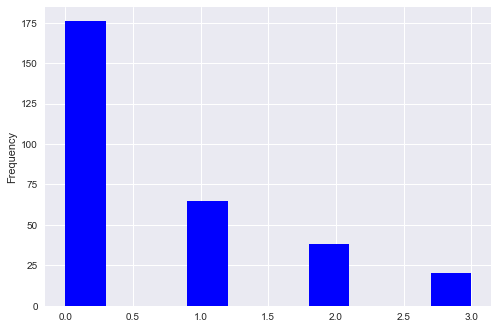

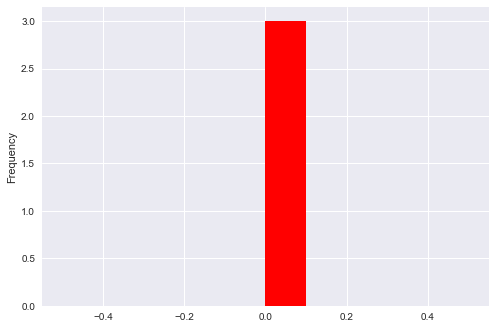

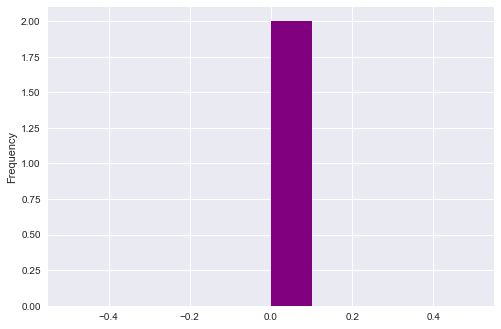

30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
Name: ca, dtype: float64
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
Name: ca, dtype: float64


/Users/vickimoore/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


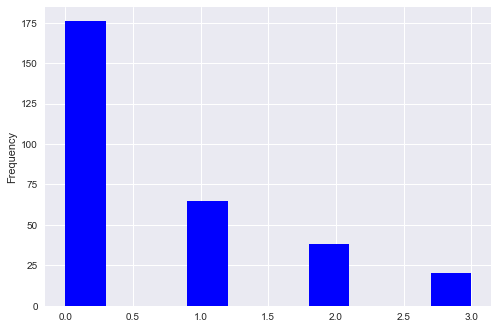

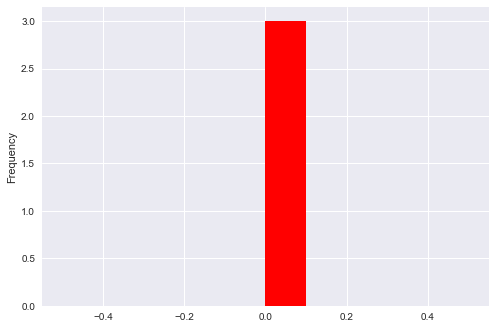

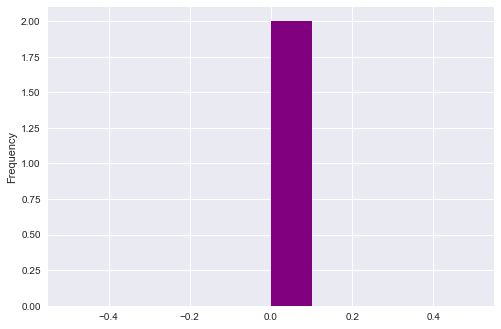

ca


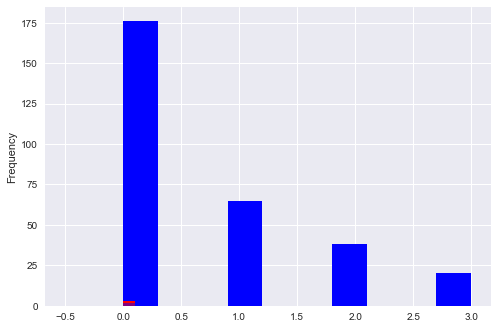

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
location    303 non-null object
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1), object(1)
memory usage: 35.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
location    295 non-null object
age         294 non-null float64
sex         294 non-null float64
cp          294 non-null float64
trestbps    293 non-null float64
chol        271 non-null float64
fbs         286 non-null float64

In [4]:
#___________________________________________ca distribution and fix na in hungarian, switch out NaN's_______________________________________________________________________________________________________
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
print(hungarian_df['ca'][30:50])
hungarian_df['ca'][39] = np.nan
print(hungarian_df['ca'][30:50])
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
print('ca')
cleveland_df['ca'].plot(kind='hist', color='blue')
hungarian_df['ca'].plot(kind='hist', color='red')
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
#discrete and non-normal. use mode.
ca_mode_cleveland = cleveland_df.ca.mode()
cleveland_df['ca'] = cleveland_df.ca.fillna(ca_mode_cleveland[0])
print(cleveland_df.info())
ca_mode_hungarian = hungarian_df.ca.mode()
hungarian_df['ca'] = hungarian_df.ca.fillna(ca_mode_hungarian[0])
print(hungarian_df.info())
ca_mode_long_beach = long_beach_df.ca.mode()
long_beach_df['ca'] = long_beach_df.ca.fillna(ca_mode_long_beach[0])
print(long_beach_df.info())


age


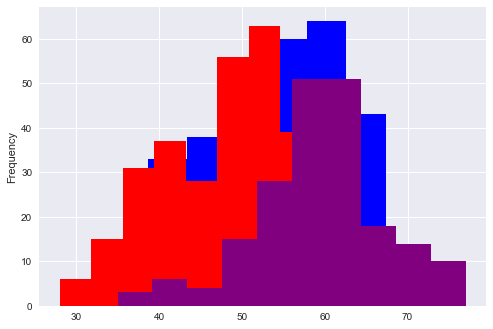

In [5]:
print('age')
cleveland_df['age'].plot(kind='hist', color='blue')
hungarian_df['age'].plot(kind='hist', color='red')
long_beach_df['age'].plot(kind='hist', color='purple')
plt.show()
#dist varies by pop but overall mostly normal, slight skew to right. continuous var. will use median for missing.
age_median_cleveland = cleveland_df.age.median()
cleveland_df['age'] = cleveland_df.age.fillna(age_median_cleveland)
age_median_hungarian = hungarian_df.age.median()
hungarian_df['age'] = hungarian_df.age.fillna(age_median_hungarian)
age_median_long_beach = long_beach_df.age.median()
long_beach_df['age'] = long_beach_df.age.fillna(age_median_long_beach)


sex


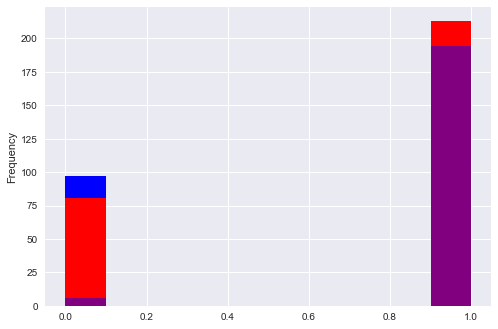

In [6]:
print('sex')
cleveland_df['sex'].plot(kind='hist', color='blue')
hungarian_df['sex'].plot(kind='hist', color='red')
long_beach_df['sex'].plot(kind='hist', color='purple')
plt.show()
#discrete and non-normal. mostly male. use mode for right now, subject to change.
sex_mode_cleveland = cleveland_df.sex.mode()
cleveland_df['sex'] = cleveland_df.sex.fillna(sex_mode_cleveland[0])
sex_mode_hungarian = hungarian_df.sex.mode()
hungarian_df['sex'] = hungarian_df.sex.fillna(sex_mode_hungarian[0])
sex_mode_long_beach = long_beach_df.sex.mode()
long_beach_df['sex'] = long_beach_df.sex.fillna(sex_mode_long_beach[0])

cp


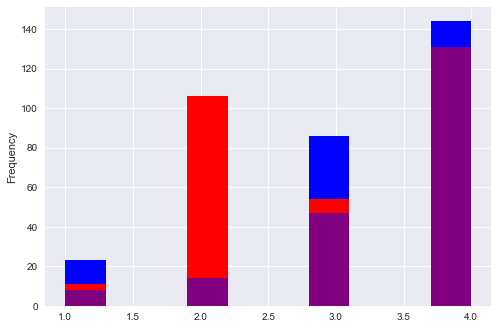

In [7]:
print('cp')
cleveland_df['cp'].plot(kind='hist', color='blue')
hungarian_df['cp'].plot(kind='hist', color='red')
long_beach_df['cp'].plot(kind='hist', color='purple')
plt.show()
#discrete and non-normal, but hungarian looks different from others. either median or mode, not sure yet. just go with median right now.
cp_median_cleveland = cleveland_df.cp.median()
cleveland_df['cp'] = cleveland_df.cp.fillna(cp_median_cleveland)
cp_median_hungarian = hungarian_df.cp.median()
hungarian_df['cp'] = hungarian_df.cp.fillna(cp_median_hungarian)
cp_median_long_beach = long_beach_df.cp.median()
long_beach_df['cp'] = long_beach_df.cp.fillna(cp_median_long_beach)


trestbps


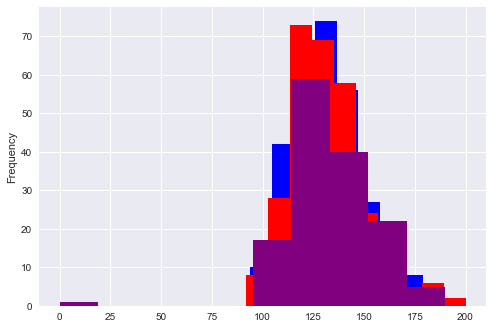

In [8]:
print('trestbps')
cleveland_df['trestbps'].plot(kind='hist', color='blue')
hungarian_df['trestbps'].plot(kind='hist', color='red')
long_beach_df['trestbps'].plot(kind='hist', color='purple')
plt.show()
#continuous and close enough to normal. use median.
trestbps_median_cleveland = cleveland_df.trestbps.median()
cleveland_df['trestbps'] = cleveland_df.trestbps.fillna(trestbps_median_cleveland)
trestbps_median_hungarian = hungarian_df.trestbps.median()
hungarian_df['trestbps'] = hungarian_df.trestbps.fillna(trestbps_median_hungarian)
trestbps_median_long_beach = long_beach_df.trestbps.median()
long_beach_df['trestbps'] = long_beach_df.trestbps.fillna(trestbps_median_long_beach)


chol


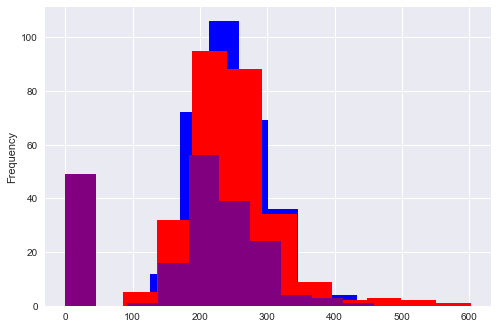

In [9]:
print('chol')
cleveland_df['chol'].plot(kind='hist', color='blue')
hungarian_df['chol'].plot(kind='hist', color='red')
long_beach_df['chol'].plot(kind='hist', color='purple')
plt.show()
#continuous and close enough to normal. use median.
chol_median_cleveland = cleveland_df.chol.median()
cleveland_df['chol'] = cleveland_df.chol.fillna(chol_median_cleveland)
chol_median_hungarian = hungarian_df.chol.median()
hungarian_df['chol'] = hungarian_df.chol.fillna(chol_median_hungarian)
chol_median_long_beach = long_beach_df.chol.median()
long_beach_df['chol'] = long_beach_df.chol.fillna(chol_median_long_beach)

fbs


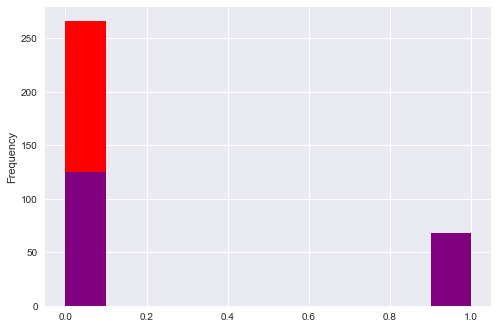

In [10]:
print('fbs')
cleveland_df['fbs'].plot(kind='hist', color='blue')
hungarian_df['fbs'].plot(kind='hist', color='red')
long_beach_df['fbs'].plot(kind='hist', color='purple')
plt.show()
#discrete and non-normal. vast majority one value. use mode.
fbs_mode_cleveland = cleveland_df.fbs.mode()
cleveland_df['fbs'] = cleveland_df.fbs.fillna(fbs_mode_cleveland[0])
fbs_mode_hungarian = hungarian_df.fbs.mode()
hungarian_df['fbs'] = hungarian_df.fbs.fillna(fbs_mode_hungarian[0])
fbs_mode_long_beach = long_beach_df.fbs.mode()
long_beach_df['fbs'] = long_beach_df.fbs.fillna(fbs_mode_long_beach[0])


restecg


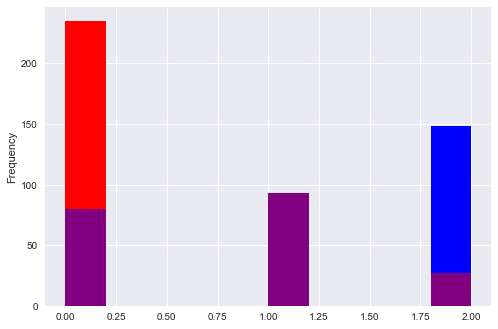

In [11]:
print('restecg')
cleveland_df['restecg'].plot(kind='hist', color='blue')
hungarian_df['restecg'].plot(kind='hist', color='red')
long_beach_df['restecg'].plot(kind='hist', color='purple')
plt.show()
#looks discrete and non-normal. varies by population. unclear whether median or mode best yet. just go with median right now.
restecg_median_cleveland = cleveland_df.restecg.median()
cleveland_df['restecg'] = cleveland_df.restecg.fillna(restecg_median_cleveland)
restecg_median_hungarian = hungarian_df.restecg.median()
hungarian_df['restecg'] = hungarian_df.restecg.fillna(restecg_median_hungarian)
restecg_median_long_beach = long_beach_df.restecg.median()
long_beach_df['restecg'] = long_beach_df.restecg.fillna(restecg_median_long_beach)

thalach


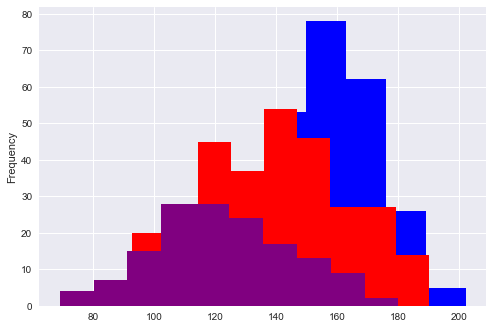

In [12]:
print('thalach')
cleveland_df['thalach'].plot(kind='hist', color='blue')
hungarian_df['thalach'].plot(kind='hist', color='red')
long_beach_df['thalach'].plot(kind='hist', color='purple')
plt.show()
#continuous but dist depends on population. use median for now.
thalach_median_cleveland = cleveland_df.thalach.median()
cleveland_df['thalach'] = cleveland_df.thalach.fillna(thalach_median_cleveland)
thalach_median_hungarian = hungarian_df.thalach.median()
hungarian_df['thalach'] = hungarian_df.thalach.fillna(thalach_median_hungarian)
thalach_median_long_beach = long_beach_df.thalach.median()
long_beach_df['thalach'] = long_beach_df.thalach.fillna(thalach_median_long_beach)

exang


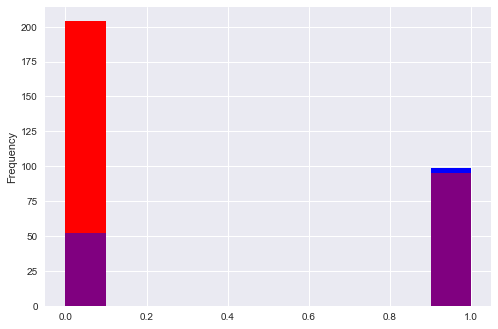

In [13]:
print('exang')
cleveland_df['exang'].plot(kind='hist', color='blue')
hungarian_df['exang'].plot(kind='hist', color='red')
long_beach_df['exang'].plot(kind='hist', color='purple')
plt.show()
#exang discrete and non-normal, but depends on pop. probably use mode for each pop.
exang_mode_cleveland = cleveland_df.exang.mode()
cleveland_df['exang'] = cleveland_df.exang.fillna(exang_mode_cleveland[0])
exang_mode_hungarian = hungarian_df.exang.mode()
hungarian_df['exang'] = hungarian_df.exang.fillna(exang_mode_hungarian[0])
exang_mode_long_beach = long_beach_df.exang.mode()
long_beach_df['exang'] = long_beach_df.exang.fillna(exang_mode_long_beach[0])

oldpeak


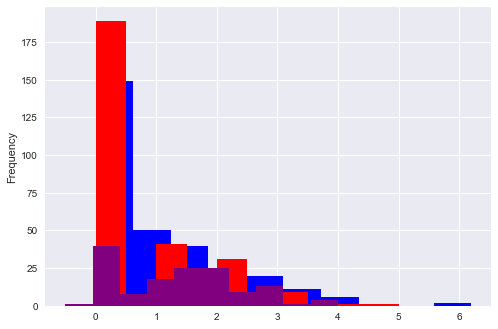

In [14]:
print('oldpeak')
cleveland_df['oldpeak'].plot(kind='hist', color='blue')
hungarian_df['oldpeak'].plot(kind='hist', color='red')
long_beach_df['oldpeak'].plot(kind='hist', color='purple')
plt.show()
#continuous but non-normal, skewed to 0. use mode or median, use median for now.
oldpeak_median_cleveland = cleveland_df.oldpeak.median()
cleveland_df['oldpeak'] = cleveland_df.oldpeak.fillna(oldpeak_median_cleveland)
oldpeak_median_hungarian = hungarian_df.oldpeak.median()
hungarian_df['oldpeak'] = hungarian_df.oldpeak.fillna(oldpeak_median_hungarian)
oldpeak_median_long_beach = long_beach_df.oldpeak.median()
long_beach_df['oldpeak'] = long_beach_df.oldpeak.fillna(oldpeak_median_long_beach)

slope


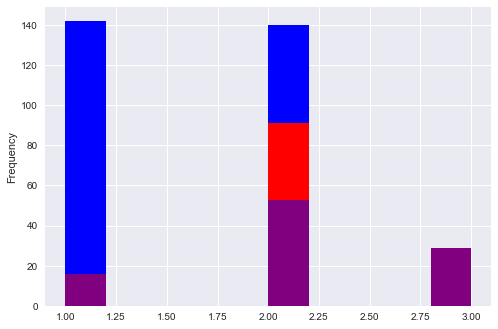

In [15]:
print('slope')
cleveland_df['slope'].plot(kind='hist', color='blue')
hungarian_df['slope'].plot(kind='hist', color='red')
long_beach_df['slope'].plot(kind='hist', color='purple')
plt.show()
#discrete and non-normal but not really skewed. use median.
slope_median_cleveland = cleveland_df.slope.median()
cleveland_df['slope'] = cleveland_df.slope.fillna(slope_median_cleveland)
slope_median_hungarian = hungarian_df.slope.median()
hungarian_df['slope'] = hungarian_df.slope.fillna(slope_median_hungarian)
slope_median_long_beach = long_beach_df.slope.median()
long_beach_df['slope'] = long_beach_df.slope.fillna(slope_median_long_beach)

thal


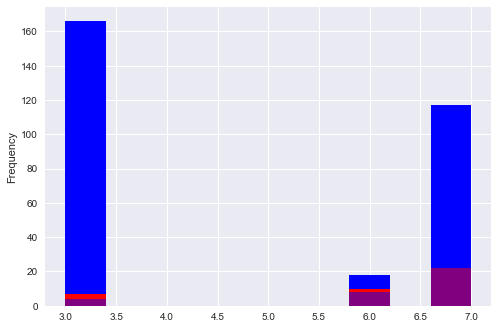

In [16]:
print('thal')
cleveland_df['thal'].plot(kind='hist', color='blue')
hungarian_df['thal'].plot(kind='hist', color='red')
long_beach_df['thal'].plot(kind='hist', color='purple')
plt.show()
#discrete and non-normal. but evenly split. maybe median? just to keep with current convention of erring on side of median, use median right now.
thal_median_cleveland = cleveland_df.thal.median()
cleveland_df['thal'] = cleveland_df.thal.fillna(thal_median_cleveland)
thal_median_hungarian = hungarian_df.thal.median()
hungarian_df['thal'] = hungarian_df.thal.fillna(thal_median_hungarian)
thal_median_long_beach = long_beach_df.thal.median()
long_beach_df['thal'] = long_beach_df.thal.fillna(thal_median_long_beach)

num


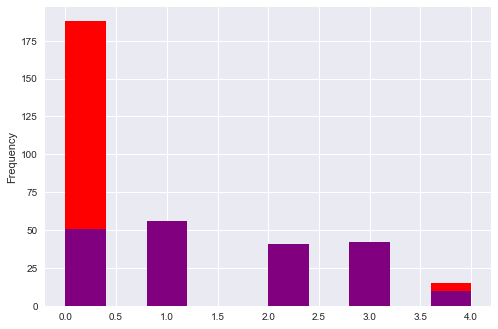

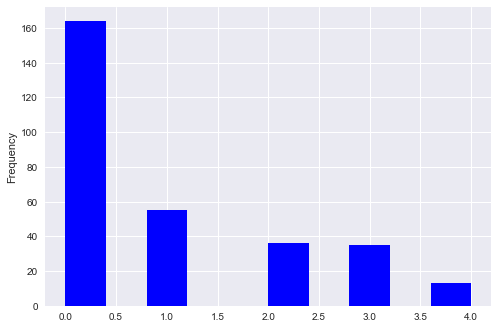

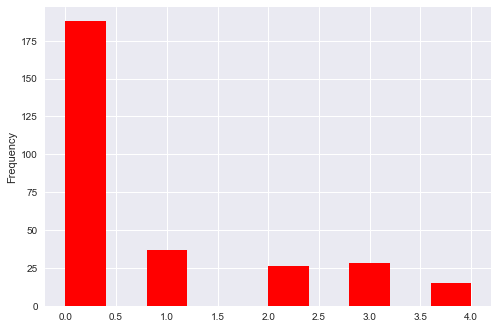

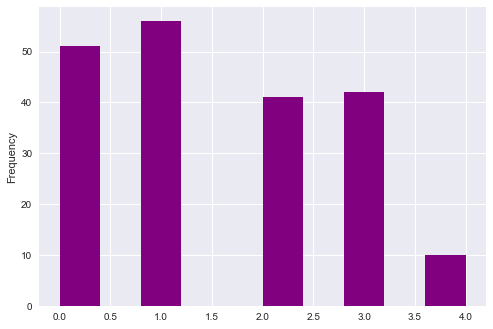

In [17]:
#TARGET variable is num
print('num')
cleveland_df['num'].plot(kind='hist', color='blue')
hungarian_df['num'].plot(kind='hist', color='red')
long_beach_df['num'].plot(kind='hist', color='purple')
plt.show()
cleveland_df['num'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['num'].plot(kind='hist', color='red')
plt.show()
long_beach_df['num'].plot(kind='hist', color='purple')
plt.show()
#switch NaN's with modes or medians from each population.

In [18]:
print(cleveland_df.info())
print(hungarian_df.info())
print(long_beach_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
location    303 non-null object
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1), object(1)
memory usage: 35.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
location    295 non-null object
age         295 non-null float64
sex         295 non-null float64
cp          295 non-null float64
trestbps    295 non-null float64
chol        295 non-null float64
fbs         295 non-null float64

In [19]:
#add location columns to each up above so as to combine.
all_three_df = pd.concat([cleveland_df, hungarian_df, long_beach_df], ignore_index=True)
print(all_three_df)
#___________________________________________set dtypes_____________________________________________________________________________________________________________
all_three_df['location'] = all_three_df['location'].astype(str)
all_three_df['age'] = all_three_df['age'].astype(float)
all_three_df['sex'] = all_three_df['sex'].astype(int)
all_three_df['cp'] = all_three_df['cp'].astype(int)
all_three_df['trestbps'] = all_three_df['trestbps'].astype(float)
all_three_df['chol'] = all_three_df['chol'].astype(float)
all_three_df['fbs'] = all_three_df['fbs'].astype(int)
all_three_df['restecg'] = all_three_df['restecg'].astype(int)
all_three_df['thalach'] = all_three_df['thalach'].astype(float)
all_three_df['exang'] = all_three_df['exang'].astype(int)
all_three_df['oldpeak'] = all_three_df['oldpeak'].astype(float)
all_three_df['slope'] = all_three_df['slope'].astype(int)
all_three_df['ca'] = all_three_df['ca'].astype(int)
all_three_df['thal'] = all_three_df['thal'].astype(int)
all_three_df['num'] = all_three_df['num'].astype(float) #because missing values that I think I shouldn't change for target
print(all_three_df.info())

       location   age  sex   cp  trestbps   chol  fbs  restecg  thalach  \
0     Cleveland  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0   
1     Cleveland  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0   
2     Cleveland  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0   
3     Cleveland  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0   
4     Cleveland  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0   
5     Cleveland  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0   
6     Cleveland  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0   
7     Cleveland  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0   
8     Cleveland  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0   
9     Cleveland  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0   
10    Cleveland  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0   
11    Cleveland  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0   
12    Cleveland  56.0  1.

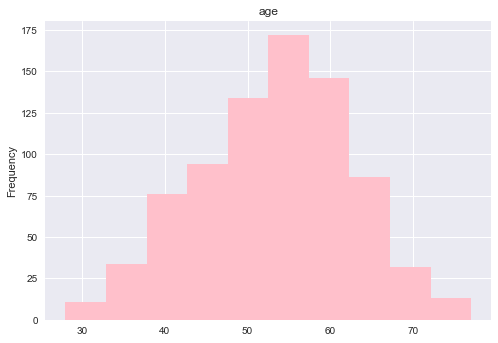

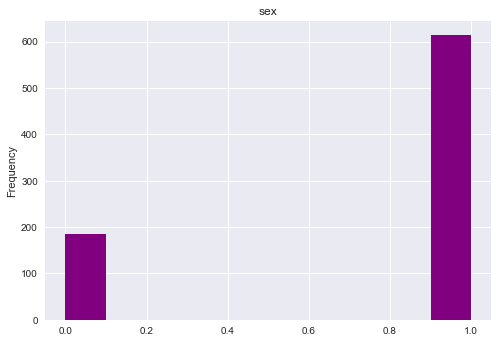

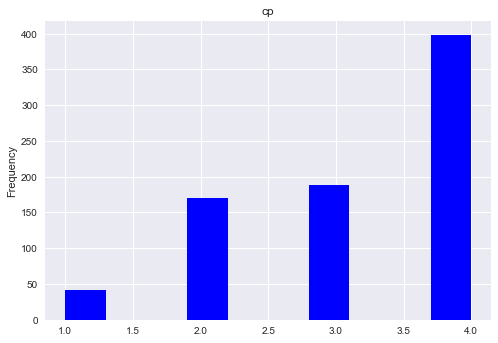

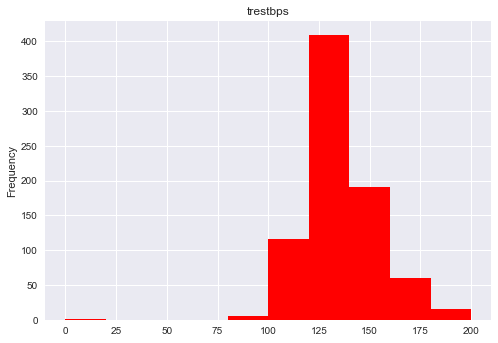

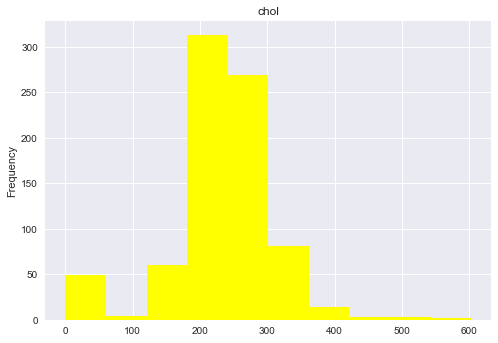

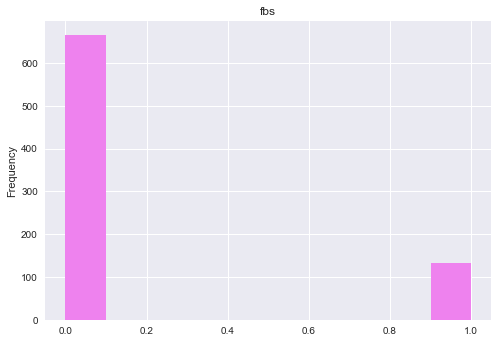

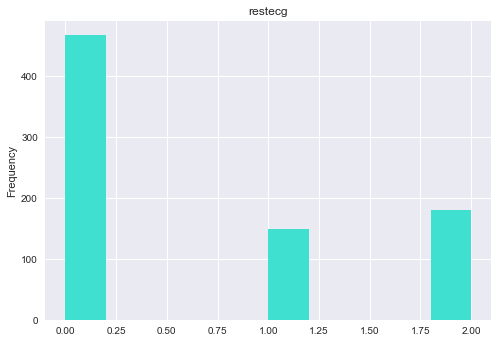

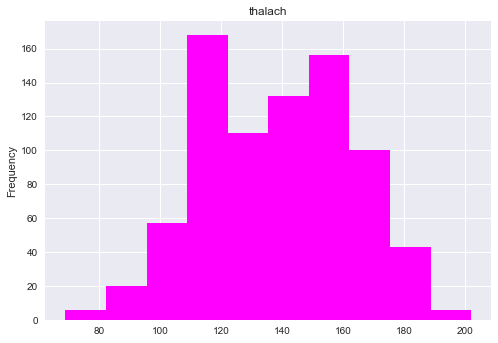

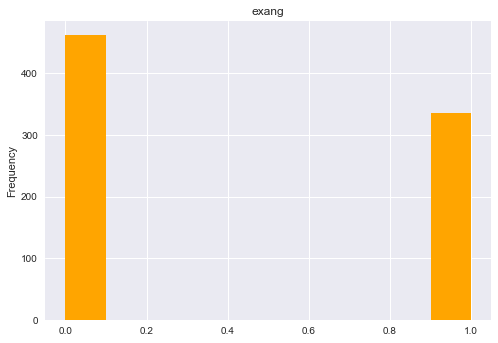

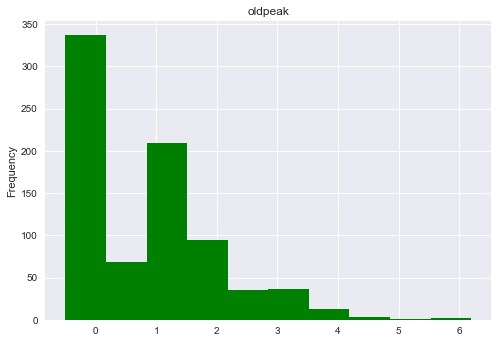

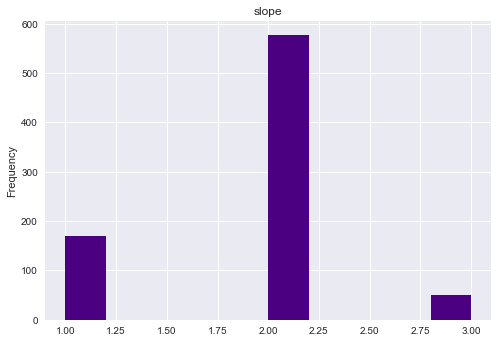

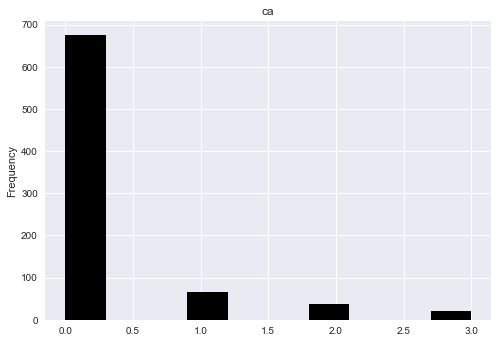

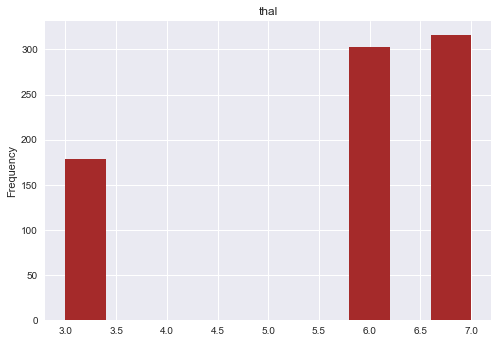

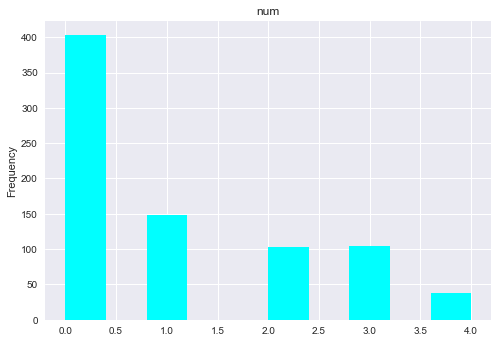

In [20]:
all_three_df['age'].plot(kind='hist', color='pink')
plt.title('age')
plt.show()
all_three_df['sex'].plot(kind='hist', color='purple')
plt.title('sex')
plt.show()
all_three_df['cp'].plot(kind='hist', color='blue')
plt.title('cp')
plt.show()
all_three_df['trestbps'].plot(kind='hist', color='red')
plt.title('trestbps')
plt.show()
all_three_df['chol'].plot(kind='hist', color='yellow')
plt.title('chol')
plt.show()
all_three_df['fbs'].plot(kind='hist', color='violet')
plt.title('fbs')
plt.show()
all_three_df['restecg'].plot(kind='hist', color='turquoise')
plt.title('restecg')
plt.show()
all_three_df['thalach'].plot(kind='hist', color='magenta')
plt.title('thalach')
plt.show()
all_three_df['exang'].plot(kind='hist', color='orange')
plt.title('exang')
plt.show()
all_three_df['oldpeak'].plot(kind='hist', color='green')
plt.title('oldpeak')
plt.show()
all_three_df['slope'].plot(kind='hist', color='indigo')
plt.title('slope')
plt.show()
all_three_df['ca'].plot(kind='hist', color='black')
plt.title('ca')
plt.show()
all_three_df['thal'].plot(kind='hist', color='brown')
plt.title('thal')
plt.show()
all_three_df['num'].plot(kind='hist', color='aqua')
plt.title('num')
plt.show()

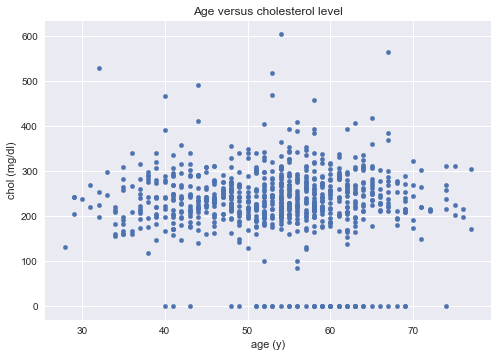

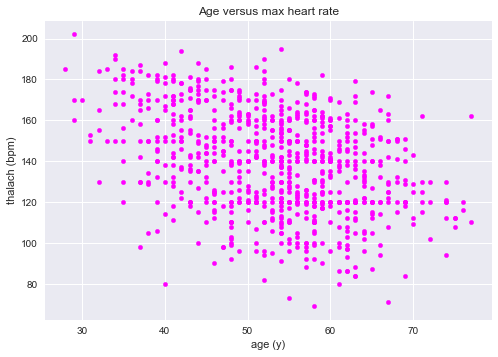

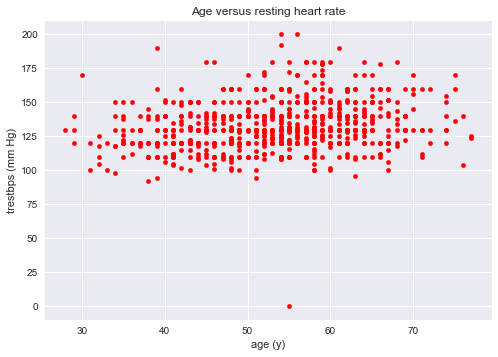

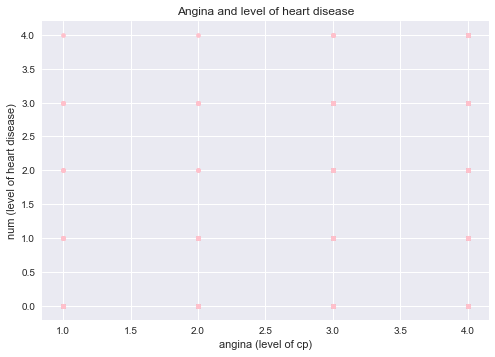

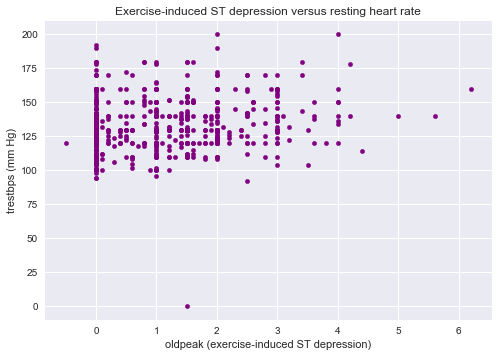

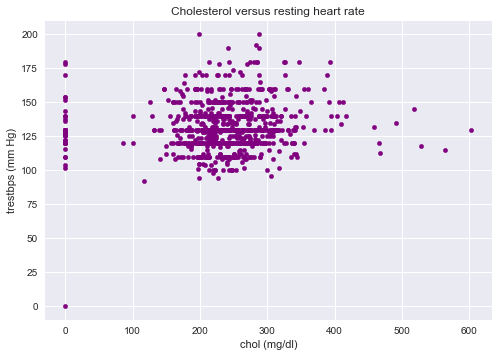

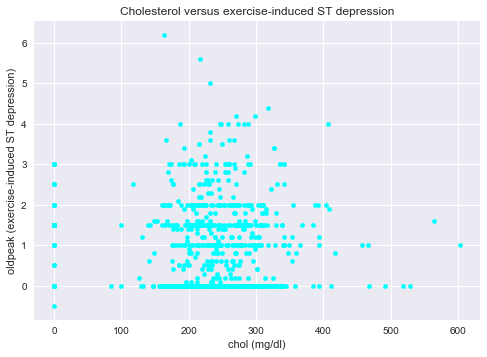

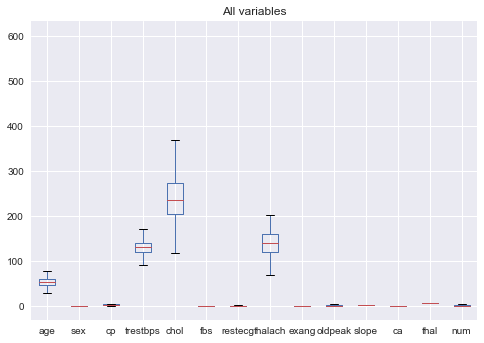

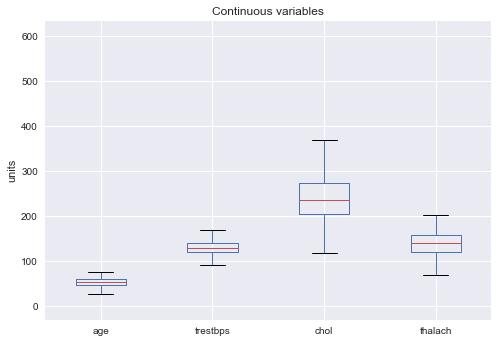

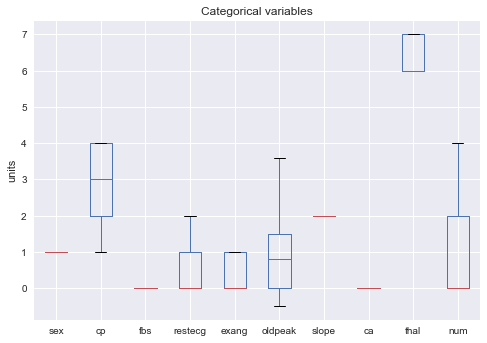

In [21]:
all_three_df.plot(x='age', y='chol', kind='scatter')
plt.xlabel('age (y)')
plt.title('Age versus cholesterol level')
plt.ylabel('chol (mg/dl)')
plt.show()
all_three_df.plot(x='age', y='thalach', kind='scatter', color='magenta')
plt.title('Age versus max heart rate')
plt.xlabel('age (y)')
plt.ylabel('thalach (bpm)')
plt.show()
all_three_df.plot(x='age', y='trestbps', kind='scatter', color='red')
plt.title('Age versus resting heart rate')
plt.xlabel('age (y)')
plt.ylabel('trestbps (mm Hg)')
plt.show()
all_three_df.plot(x='cp', y='num', kind='scatter', color='pink')
plt.title('Angina and level of heart disease')
plt.xlabel('angina (level of cp)')
plt.ylabel('num (level of heart disease)')
plt.show()
all_three_df.plot(x='oldpeak', y='trestbps', kind='scatter', color='purple')
plt.title('Exercise-induced ST depression versus resting heart rate')
plt.xlabel('oldpeak (exercise-induced ST depression)')
plt.ylabel('trestbps (mm Hg)')
plt.show()
all_three_df.plot(x='chol', y='trestbps', kind='scatter', color='purple')
plt.title('Cholesterol versus resting heart rate')
plt.xlabel('chol (mg/dl)')
plt.ylabel('trestbps (mm Hg)')
plt.show()
all_three_df.plot(x='chol', y='oldpeak', kind='scatter', color='aqua')
plt.title('Cholesterol versus exercise-induced ST depression')
plt.xlabel('chol (mg/dl)')
plt.ylabel('oldpeak (exercise-induced ST depression)')
plt.show()
all_three_df.plot(kind='box')
plt.title('All variables')
plt.show()
all_three_df.plot(y=['age', 'trestbps', 'chol', 'thalach'], kind='box')
plt.title('Continuous variables')
plt.ylabel('units')
plt.show()
all_three_df.plot(y=['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], kind='box')
plt.title('Categorical variables')
plt.ylabel('units')
plt.show()

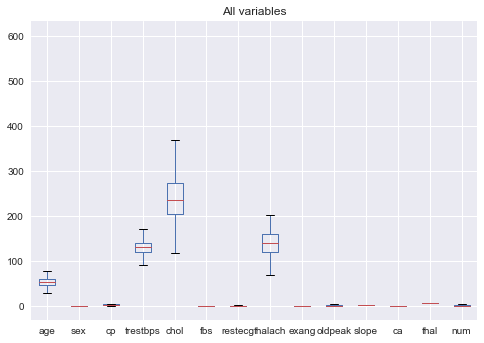

In [24]:
#Age versus maximum cholesterol level, above, shows a lot of scatter, but it does appear there may 
#be a trend, though this would require more sophisticated analysis.

#Many scatter plots of continuous variables resemble these above, where there are slight signals,
#but mostly the data are quite spread out.
#Next up are box plots, starting with all variables in one plot.
all_three_df.plot(kind='box')
plt.title('All variables')
plt.show()

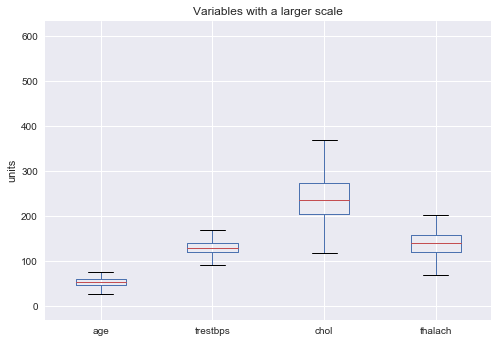

In [31]:
#Data do not mix well in this graph above, so plotting separately now with different scales.
all_three_df.plot(y=['age', 'trestbps', 'chol', 'thalach'], kind='box')
plt.title('Variables with a larger scale')
plt.ylabel('units')
plt.show()

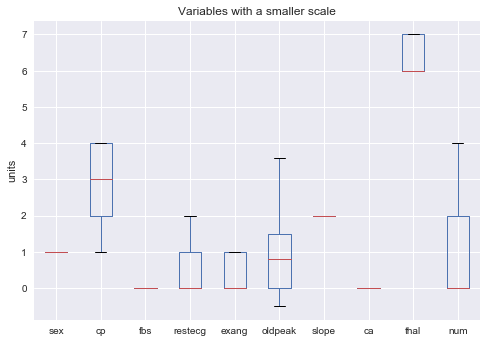

In [30]:
all_three_df.plot(y=['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], kind='box')
plt.title('Variables with a smaller scale')
plt.ylabel('units')
plt.show()

Not all variables (such as categorical data) are amenable to presentation in a boxplot, and oldpeak is the only continuous variable in this second boxplot.

In [22]:
print(all_three_df.describe())
print(all_three_df.median())

              age         sex          cp    trestbps        chol         fbs  \
count  798.000000  798.000000  798.000000  798.000000  798.000000  798.000000   
mean    53.226817    0.769424    3.180451  132.269424  231.290727    0.166667   
std      9.453840    0.421466    0.943854   17.758772   81.205353    0.372912   
min     28.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%     46.250000    1.000000    2.000000  120.000000  204.000000    0.000000   
50%     54.000000    1.000000    3.000000  130.000000  236.000000    0.000000   
75%     60.000000    1.000000    4.000000  140.000000  273.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  798.000000  798.000000  798.000000  798.000000  798.000000  798.000000   
mean     0.640351  138.830827    0.421053    0.954261    1.850877    0.251880   
std      0.827523   24.6156

For many of the scatterplots there is not much to discern. There are many categorical variables in this dataset, and continuous variables paired against each other do not reveal patterns individually that well with this dataset. Perhaps some can emerge when looking at linear regressions among some of these, and also while taking advantage of the ability to track patterns with data subdivided into two categories in Seaborn (in this case separating by sex).

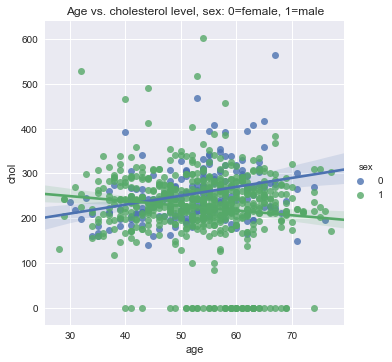

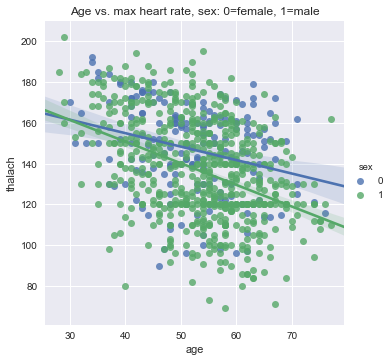

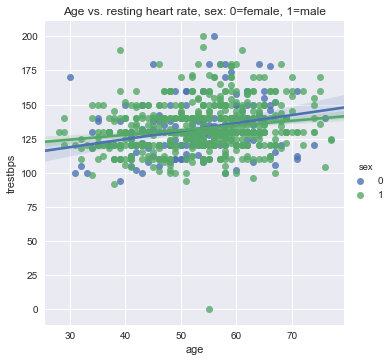

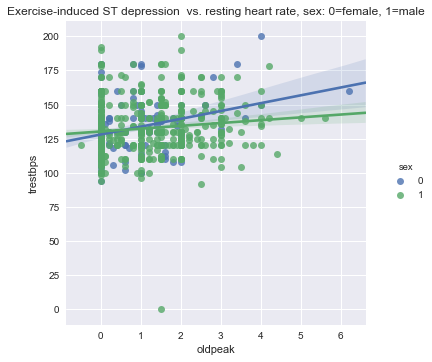

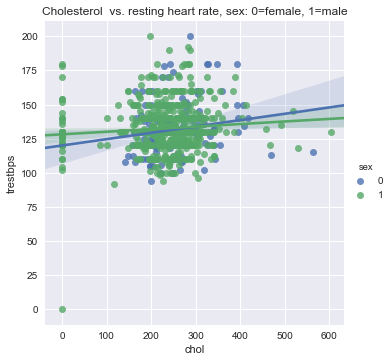

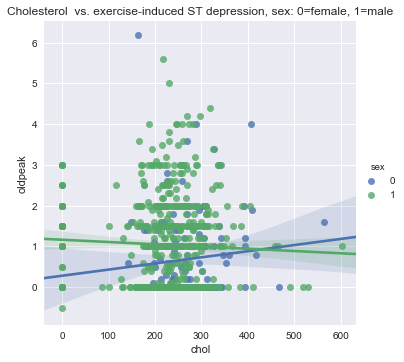

In [109]:
sns.lmplot(x='age', y='chol', data=all_three_df, hue='sex')
plt.title('Age vs. cholesterol level, sex: 0=female, 1=male')
plt.show()
sns.lmplot(x='age', y='thalach', data=all_three_df, hue='sex')
plt.title('Age vs. max heart rate, sex: 0=female, 1=male')
plt.show()
sns.lmplot(x='age', y='trestbps', data=all_three_df, hue='sex')
plt.title('Age vs. resting heart rate, sex: 0=female, 1=male')
plt.show()
sns.lmplot(x='oldpeak', y='trestbps', data=all_three_df, hue='sex')
plt.title('Exercise-induced ST depression  vs. resting heart rate, sex: 0=female, 1=male')
plt.show()
sns.lmplot(x='chol', y='trestbps', data=all_three_df, hue='sex')
plt.title('Cholesterol  vs. resting heart rate, sex: 0=female, 1=male')
plt.show()
sns.lmplot(x='chol', y='oldpeak', data=all_three_df, hue='sex')
plt.title('Cholesterol  vs. exercise-induced ST depression, sex: 0=female, 1=male')
plt.show()

The above charts show a substantial amount of noise in the data, though some trends may be present. Overall, most of the data available in this dataset do not show obvious, striking patterns between variables paired against each other one-on-one. Also, many variables are categorical, which are harder to plot and view patterns with, so they are excluded here. Among the continuous variables, though, there may be some patterns to look out for, as described above, but overall it is my expectation that the predictive power of these variables will come from examining them collectively, in a multivariate manner, and in a way that enables meaningful consideration of the discrete variables used here. Categorical data are not ideal, particularly when the variables in question frequently come from patient measurements that are continuous in nature, but the categories used may provide care providers with convenient ways of looking at patient health, and this is what is available for us to model. One variable, for instance, that should impact level of heart disease risk is the 'ca' value, though here it is presented as a categorical variable with few category options, and it is only captured in the Cleveland dataset, which may impact the predictive power of the model. Heart disease level itself is presented as a categorical variable. More sophisticated analyses of variables such as cholesterol and sex may show stronger correlations with level of heart disease than what is viewable in the simpler exploratory analyses shown here. 

It is hard to make much of these data at this point, but even though there is much noise in the data viewed here, the trendlines show potential for some relationships to hold value as far as predictive utility.

## Exploratory data analysis
There is a total of 14 numerical variables, including the target variable, included in this dataset. Some are continuous variables, including age, trestbps, chol, thalach, and oldpeak. The rest are categorical variables, including sex (two categories as 0 and 1), cp (four categories as 1, 2, 3, and 4), fbs (two categories as 0 and 1), restecg (three categories as 0, 1, and 2), exang (two categories as 0 and 1), slope (three categories as 1, 2, and 3), ca (four categories as 0, 1, 2, and 3), thal (three categories as 3, 6, and 7), and the target variable num (five categories as 0, 1, 2, 3, and 4). Location will become a separate variable to consider in the consolidated dataset, as the location associated with each subset is present in a new column in the consolidated set.

The continuous and categorical variables will be explored differently. Primarily, continuous variables will be compared with each other using tests of Pearson's correlation coefficients, and categorical variables will primarily be compared to each other using chi-squared tests of independence.

A goal of this exploratory analysis is to determine whether variables show correlations with each other and to judge the statistical significance of these relationships. The null hypothesis for each test is that there is no correlation between variables, with an alternate hypothesis for each being that there is a correlation.

In [34]:
#Scipy calculation of Pearson's r and p-value of correlation between age and trestbps
pearsonr(all_three_df['age'], all_three_df['trestbps'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['age'], all_three_df['trestbps'])[0])
print("Significance value (p):",pearsonr(all_three_df['age'], all_three_df['trestbps'])[1])

Pearson's correlation coefficient (r): 0.213248860034
Significance value (p): 1.16691311334e-09


In [35]:
#Scipy calculation of Pearson's r and p-value of correlation between age and chol
pearsonr(all_three_df['age'], all_three_df['chol'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['age'], all_three_df['chol'])[0])
print("Significance value (p):",pearsonr(all_three_df['age'], all_three_df['chol'])[1])

Pearson's correlation coefficient (r): -0.0533482897554
Significance value (p): 0.132133884101


In [36]:
#Scipy calculation of Pearson's r and p-value of correlation between age and thalach
pearsonr(all_three_df['age'], all_three_df['thalach'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['age'], all_three_df['thalach'])[0])
print("Significance value (p):",pearsonr(all_three_df['age'], all_three_df['thalach'])[1])

Pearson's correlation coefficient (r): -0.381887696722
Significance value (p): 4.16155214419e-29


In [37]:
#Scipy calculation of Pearson's r and p-value of correlation between age and oldpeak
pearsonr(all_three_df['age'], all_three_df['oldpeak'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['age'], all_three_df['oldpeak'])[0])
print("Significance value (p):",pearsonr(all_three_df['age'], all_three_df['oldpeak'])[1])

Pearson's correlation coefficient (r): 0.296045856953
Significance value (p): 1.31844385708e-17


In [38]:
#Scipy calculation of Pearson's r and p-value of correlation between trestbps and chol
pearsonr(all_three_df['trestbps'], all_three_df['chol'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['trestbps'], all_three_df['chol'])[0])
print("Significance value (p):",pearsonr(all_three_df['trestbps'], all_three_df['chol'])[1])

Pearson's correlation coefficient (r): 0.100284102466
Significance value (p): 0.00457360546714


In [39]:
#Scipy calculation of Pearson's r and p-value of correlation between trestbps and thalach
pearsonr(all_three_df['trestbps'], all_three_df['thalach'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['trestbps'], all_three_df['thalach'])[0])
print("Significance value (p):",pearsonr(all_three_df['trestbps'], all_three_df['thalach'])[1])

Pearson's correlation coefficient (r): -0.0909337331541
Significance value (p): 0.0101675890335


In [40]:
#Scipy calculation of Pearson's r and p-value of correlation between trestbps and oldpeak
pearsonr(all_three_df['trestbps'], all_three_df['oldpeak'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['trestbps'], all_three_df['oldpeak'])[0])
print("Significance value (p):",pearsonr(all_three_df['trestbps'], all_three_df['oldpeak'])[1])

Pearson's correlation coefficient (r): 0.164200633843
Significance value (p): 3.1178514034e-06


In [41]:
#Scipy calculation of Pearson's r and p-value of correlation between chol and thalach
pearsonr(all_three_df['chol'], all_three_df['thalach'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['chol'], all_three_df['thalach'])[0])
print("Significance value (p):",pearsonr(all_three_df['chol'], all_three_df['thalach'])[1])

Pearson's correlation coefficient (r): 0.0937200524228
Significance value (p): 0.00806896018185


In [42]:
#Scipy calculation of Pearson's r and p-value of correlation between chol and oldpeak
pearsonr(all_three_df['chol'], all_three_df['oldpeak'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['chol'], all_three_df['oldpeak'])[0])
print("Significance value (p):",pearsonr(all_three_df['chol'], all_three_df['oldpeak'])[1])

Pearson's correlation coefficient (r): -0.0416056642798
Significance value (p): 0.240403040188


In [43]:
#Scipy calculation of Pearson's r and p-value of correlation between thalach and oldpeak
pearsonr(all_three_df['thalach'], all_three_df['oldpeak'])
print("Pearson's correlation coefficient (r):", pearsonr(all_three_df['thalach'], all_three_df['oldpeak'])[0])
print("Significance value (p):",pearsonr(all_three_df['thalach'], all_three_df['oldpeak'])[1])

Pearson's correlation coefficient (r): -0.248458637351
Significance value (p): 1.08229551212e-12


In [66]:
#Chi-squared test sex and cp
sexcp = pd.crosstab(all_three_df.sex, all_three_df.cp)
stats.chi2_contingency(sexcp)
print("Chi-2 statistic:",stats.chi2_contingency(sexcp)[0], "p-value:",stats.chi2_contingency(sexcp)[1])

Chi-2 statistic: 30.6182446217 p-value: 1.02284443703e-06


In [67]:
#Chi-squared test sex and restecg
sexrestecg = pd.crosstab(all_three_df.sex, all_three_df.restecg)
stats.chi2_contingency(sexrestecg)
print("Chi-2 statistic:",stats.chi2_contingency(sexrestecg)[0], "p-value:",stats.chi2_contingency(sexrestecg)[1])

Chi-2 statistic: 3.61979105572 p-value: 0.163671234994


In [69]:
#Chi-squared test sex and fbs
sexfbs = pd.crosstab(all_three_df.sex, all_three_df.fbs)
stats.chi2_contingency(sexfbs)
print("Chi-2 statistic:",stats.chi2_contingency(sexfbs)[0], "p-value:",stats.chi2_contingency(sexfbs)[1])

Chi-2 statistic: 6.3415628098 p-value: 0.0117940922548


In [70]:
#Chi-squared test sex and exang
sexexang = pd.crosstab(all_three_df.sex, all_three_df.exang)
stats.chi2_contingency(sexexang)
print("Chi-2 statistic:",stats.chi2_contingency(sexexang)[0], "p-value:",stats.chi2_contingency(sexexang)[1])

Chi-2 statistic: 37.4982554118 p-value: 9.14947853996e-10


In [71]:
#Chi-squared test sex and slope
sexslope = pd.crosstab(all_three_df.sex, all_three_df.slope)
stats.chi2_contingency(sexslope)
print("Chi-2 statistic:",stats.chi2_contingency(sexslope)[0], "p-value:",stats.chi2_contingency(sexslope)[1])

Chi-2 statistic: 12.9461842607 p-value: 0.00154444272366


In [72]:
#Chi-squared test sex and ca
sexca = pd.crosstab(all_three_df.sex, all_three_df.ca)
stats.chi2_contingency(sexca)
print("Chi-2 statistic:",stats.chi2_contingency(sexca)[0], "p-value:",stats.chi2_contingency(sexca)[1])

Chi-2 statistic: 2.88026122181 p-value: 0.410457338257


In [73]:
#Chi-squared test sex and thal
sexthal = pd.crosstab(all_three_df.sex, all_three_df.thal)
stats.chi2_contingency(sexthal)
print("Chi-2 statistic:",stats.chi2_contingency(sexthal)[0], "p-value:",stats.chi2_contingency(sexthal)[1])

Chi-2 statistic: 96.04916591 p-value: 1.39055645988e-21


In [74]:
#Chi-squared test sex and num
sexnum = pd.crosstab(all_three_df.sex, all_three_df.num)
stats.chi2_contingency(sexnum)
print("Chi-2 statistic:",stats.chi2_contingency(sexnum)[0], "p-value:",stats.chi2_contingency(sexnum)[1])

Chi-2 statistic: 74.1080989243 p-value: 3.07632110357e-15


In [75]:
#Chi-squared test cp and fbs
cpfbs = pd.crosstab(all_three_df.cp, all_three_df.fbs)
stats.chi2_contingency(cpfbs)
print("Chi-2 statistic:",stats.chi2_contingency(cpfbs)[0], "p-value:",stats.chi2_contingency(cpfbs)[1])

Chi-2 statistic: 7.1327819861 p-value: 0.0677838478068


In [76]:
#Chi-squared test cp and restecg
cprestecg = pd.crosstab(all_three_df.cp, all_three_df.restecg)
stats.chi2_contingency(cprestecg)
print("Chi-2 statistic:",stats.chi2_contingency(cprestecg)[0], "p-value:",stats.chi2_contingency(cprestecg)[1])

Chi-2 statistic: 21.6913883245 p-value: 0.00137705076541


In [77]:
#Chi-squared test cp and exang
cpexang = pd.crosstab(all_three_df.cp, all_three_df.exang)
stats.chi2_contingency(cpexang)
print("Chi-2 statistic:",stats.chi2_contingency(cpexang)[0], "p-value:",stats.chi2_contingency(cpexang)[1])

Chi-2 statistic: 155.0709317 p-value: 2.12204362265e-33


In [78]:
#Chi-squared test cp and slope
cpslope = pd.crosstab(all_three_df.cp, all_three_df.slope)
stats.chi2_contingency(cpslope)
print("Chi-2 statistic:",stats.chi2_contingency(cpslope)[0], "p-value:",stats.chi2_contingency(cpslope)[1])

Chi-2 statistic: 25.6817012901 p-value: 0.000255179705542


In [79]:
#Chi-squared test cp and ca
cpca = pd.crosstab(all_three_df.cp, all_three_df.ca)
stats.chi2_contingency(cpca)
print("Chi-2 statistic:",stats.chi2_contingency(cpca)[0], "p-value:",stats.chi2_contingency(cpca)[1])

Chi-2 statistic: 27.3182711936 p-value: 0.00123883534278


In [80]:
#Chi-squared test cp and thal
cpthal = pd.crosstab(all_three_df.cp, all_three_df.thal)
stats.chi2_contingency(cpthal)
print("Chi-2 statistic:",stats.chi2_contingency(cpthal)[0], "p-value:",stats.chi2_contingency(cpthal)[1])

Chi-2 statistic: 99.2572136661 p-value: 3.58509991503e-19


In [81]:
#Chi-squared test cp and num
cpnum = pd.crosstab(all_three_df.cp, all_three_df.num)
stats.chi2_contingency(cpnum)
print("Chi-2 statistic:",stats.chi2_contingency(cpnum)[0], "p-value:",stats.chi2_contingency(cpnum)[1])

Chi-2 statistic: 218.601113789 p-value: 4.62851816876e-40


In [85]:
#Chi-squared test fbs and restecg
fbsrestecg = pd.crosstab(all_three_df.fbs, all_three_df.restecg)
stats.chi2_contingency(fbsrestecg)
print("Chi-2 statistic:",stats.chi2_contingency(fbsrestecg)[0], "p-value:",stats.chi2_contingency(fbsrestecg)[1])

Chi-2 statistic: 25.34878222 p-value: 3.13027057951e-06


In [86]:
#Chi-squared test fbs and exang
fbsexang = pd.crosstab(all_three_df.fbs, all_three_df.exang)
stats.chi2_contingency(fbsexang)
print("Chi-2 statistic:",stats.chi2_contingency(fbsexang)[0], "p-value:",stats.chi2_contingency(fbsexang)[1])

Chi-2 statistic: 5.78327922078 p-value: 0.0161793288027


In [87]:
#Chi-squared test fbs and slope
fbsslope = pd.crosstab(all_three_df.fbs, all_three_df.slope)
stats.chi2_contingency(fbsslope)
print("Chi-2 statistic:",stats.chi2_contingency(fbsslope)[0], "p-value:",stats.chi2_contingency(fbsslope)[1])

Chi-2 statistic: 5.4756407381 p-value: 0.0647112399114


In [88]:
#Chi-squared test fbs and ca
fbsca = pd.crosstab(all_three_df.fbs, all_three_df.ca)
stats.chi2_contingency(fbsca)
print("Chi-2 statistic:",stats.chi2_contingency(fbsca)[0], "p-value:",stats.chi2_contingency(fbsca)[1])

Chi-2 statistic: 4.05034278003 p-value: 0.256079081091


In [89]:
#Chi-squared test fbs and thal
fbsthal = pd.crosstab(all_three_df.fbs, all_three_df.thal)
stats.chi2_contingency(fbsthal)
print("Chi-2 statistic:",stats.chi2_contingency(fbsthal)[0], "p-value:",stats.chi2_contingency(fbsthal)[1])

Chi-2 statistic: 30.7454342789 p-value: 2.10723889817e-07


In [90]:
#Chi-squared test fbs and num
fbsnum = pd.crosstab(all_three_df.fbs, all_three_df.num)
stats.chi2_contingency(fbsnum)
print("Chi-2 statistic:",stats.chi2_contingency(fbsnum)[0], "p-value:",stats.chi2_contingency(fbsnum)[1])

Chi-2 statistic: 23.5136749643 p-value: 9.99570383092e-05


In [91]:
#Chi-squared test restecg and exang
restecgexang = pd.crosstab(all_three_df.restecg, all_three_df.exang)
stats.chi2_contingency(restecgexang)
print("Chi-2 statistic:",stats.chi2_contingency(restecgexang)[0], "p-value:",stats.chi2_contingency(restecgexang)[1])

Chi-2 statistic: 24.172182436 p-value: 5.63737955684e-06


In [92]:
#Chi-squared test restecg and slope
restecgslope = pd.crosstab(all_three_df.restecg, all_three_df.slope)
stats.chi2_contingency(restecgslope)
print("Chi-2 statistic:",stats.chi2_contingency(restecgslope)[0], "p-value:",stats.chi2_contingency(restecgslope)[1])

Chi-2 statistic: 45.7377533276 p-value: 2.7925762359e-09


In [93]:
#Chi-squared test restecg and ca
restecgca = pd.crosstab(all_three_df.restecg, all_three_df.ca)
stats.chi2_contingency(restecgca)
print("Chi-2 statistic:",stats.chi2_contingency(restecgca)[0], "p-value:",stats.chi2_contingency(restecgca)[1])

Chi-2 statistic: 102.505248661 p-value: 7.52685106469e-20


In [94]:
#Chi-squared test restecg and thal
restecgthal = pd.crosstab(all_three_df.restecg, all_three_df.thal)
stats.chi2_contingency(restecgthal)
print("Chi-2 statistic:",stats.chi2_contingency(restecgthal)[0], "p-value:",stats.chi2_contingency(restecgthal)[1])

Chi-2 statistic: 147.83394019 p-value: 5.9271780494e-31


In [95]:
#Chi-squared test restecg and num
restecgnum = pd.crosstab(all_three_df.restecg, all_three_df.num)
stats.chi2_contingency(restecgnum)
print("Chi-2 statistic:",stats.chi2_contingency(restecgnum)[0], "p-value:",stats.chi2_contingency(restecgnum)[1])

Chi-2 statistic: 28.4096603337 p-value: 0.000402306782123


In [96]:
#Chi-squared test exang and slope
exangslope = pd.crosstab(all_three_df.exang, all_three_df.slope)
stats.chi2_contingency(exangslope)
print("Chi-2 statistic:",stats.chi2_contingency(exangslope)[0], "p-value:",stats.chi2_contingency(exangslope)[1])

Chi-2 statistic: 43.3182817959 p-value: 3.92242479206e-10


In [97]:
#Chi-squared test exang and ca
exangca = pd.crosstab(all_three_df.exang, all_three_df.ca)
stats.chi2_contingency(exangca)
print("Chi-2 statistic:",stats.chi2_contingency(exangca)[0], "p-value:",stats.chi2_contingency(exangca)[1])

Chi-2 statistic: 0.988918997669 p-value: 0.803933207475


In [98]:
#Chi-squared test exang and thal
exangthal = pd.crosstab(all_three_df.exang, all_three_df.thal)
stats.chi2_contingency(exangthal)
print("Chi-2 statistic:",stats.chi2_contingency(exangthal)[0], "p-value:",stats.chi2_contingency(exangthal)[1])

Chi-2 statistic: 128.514297207 p-value: 1.2401520591e-28


In [99]:
#Chi-squared test exang and num
exangnum = pd.crosstab(all_three_df.exang, all_three_df.num)
stats.chi2_contingency(exangnum)
print("Chi-2 statistic:",stats.chi2_contingency(exangnum)[0], "p-value:",stats.chi2_contingency(exangnum)[1])

Chi-2 statistic: 202.149448543 p-value: 1.29635278307e-42


In [100]:
#Chi-squared test slope and ca
slopeca = pd.crosstab(all_three_df.slope, all_three_df.ca)
stats.chi2_contingency(slopeca)
print("Chi-2 statistic:",stats.chi2_contingency(slopeca)[0], "p-value:",stats.chi2_contingency(slopeca)[1])

Chi-2 statistic: 31.0193129857 p-value: 2.5134964214e-05


In [104]:
#Chi-squared test slope and thal
slopethal = pd.crosstab(all_three_df.slope, all_three_df.thal)
stats.chi2_contingency(slopethal)
print("Chi-2 statistic:",stats.chi2_contingency(slopethal)[0], "p-value:",stats.chi2_contingency(slopethal)[1])

Chi-2 statistic: 228.802382792 p-value: 2.39003436832e-48


In [103]:
#Chi-squared test slope and num
slopenum = pd.crosstab(all_three_df.slope, all_three_df.num)
stats.chi2_contingency(slopenum)
print("Chi-2 statistic:",stats.chi2_contingency(slopenum)[0], "p-value:",stats.chi2_contingency(slopenum)[1])

Chi-2 statistic: 61.8457219157 p-value: 2.02222528347e-10


In [105]:
#Chi-squared test ca and thal
cathal = pd.crosstab(all_three_df.ca, all_three_df.thal)
stats.chi2_contingency(cathal)
print("Chi-2 statistic:",stats.chi2_contingency(cathal)[0], "p-value:",stats.chi2_contingency(cathal)[1])

Chi-2 statistic: 61.6903530459 p-value: 2.03983672684e-11


In [106]:
#Chi-squared test ca and num
canum = pd.crosstab(all_three_df.ca, all_three_df.num)
stats.chi2_contingency(canum)
print("Chi-2 statistic:",stats.chi2_contingency(canum)[0], "p-value:",stats.chi2_contingency(canum)[1])

Chi-2 statistic: 71.0776305986 p-value: 2.01237244858e-10


In [107]:
#Chi-squared test thal and num
thalnum = pd.crosstab(all_three_df.thal, all_three_df.num)
stats.chi2_contingency(thalnum)
print("Chi-2 statistic:",stats.chi2_contingency(thalnum)[0], "p-value:",stats.chi2_contingency(thalnum)[1])

Chi-2 statistic: 153.739743383 p-value: 3.25096787312e-29


## Summary of correlations
In the cells above the continuous variables were all examined for correlations with each other, followed by chi-squared contingency tests for all discrete variables against each other. The following is an accounting of the test statistics and p-values associated with each. Statistically significant correlations or chi-squared statistics are shown in bold (if p < 0.001) or italics (if p >= 0.001).

1. **age and trestbps: Pearson’s r: 0.213, p=1.17e-9**
2. age and chol: Pearson’s r: -0.05, p=0.132
3. **age and thalach: Pearson’s r: -0.382, p=4.16e-29**
4. **age and oldpeak: Pearson’s r: 0.296, p=1.32e-17**
5. *trestbps and chol: Pearson’s r: 0.100, p=0.005*
6. *trestbps and thalach: Pearson’s r: -0.091, p=0.010*
7. **trestbps and oldpeak: Pearson’s r: 0.164, p=3.12e-6**
8. *chol and thalach: Pearson’s r: 0.094, p=0.008*
9. chol and oldpeak: Pearson’s r: -0.042, p=0.240
10. **thalach and oldpeak: Pearson’s r: -0.248, p=1.08e-12**

11. **sex and cp: chi-squared statistic: 30.6, p=1.02e-6**
12. *sex and fbs: chi-squared statistic: 6.34, p=0.012*
13. sex and restecg: chi-squared statistic: 3.62, p=0.164
14. **sex and exang: chi-squared statistic: 37.5, p=9.15e-10**
15. *sex and slope: chi-squared statistic: 12.9, p=0.002*
16. sex and ca: chi-squared statistic: 2.88, p=0.410
17. **sex and thal: chi-squared statistic: 96.1, p=1.39e-21**
18. **sex and num: chi-squared statistic: 74.1, p=3.08e-15**

19. cp and fbs: chi-squared statistic: 7.13, p=0.068
20. *cp and restecg: chi-squared statistic: 21.7, p=0.001*
21. **cp and exang: chi-squared statistic: 155, p=2.12e-33**
22. **cp and slope: chi-squared statistic: 25.7, p=0.0003**
23. *cp and ca: chi-squared statistic: 27.3, p=0.001*
24. **cp and thal: chi-squared statistic: 99.3, p=3.59e-19**
25. **cp and num: chi-squared statistic: 219, p=4.63e-40**

26. **fbs and restecg: chi-squared statistic: 25.3, p=3.13e-6**
27. *fbs and exang: chi-squared statistic: 5.78, p=0.016*
28. fbs and slope: chi-squared statistic: 5.48, p=0.065
29. fbs and ca: chi-squared statistic: 4.05, p=0.256
30. **fbs and thal: chi-squared statistic: 30.7, p=2.11e-7**
31. **fbs and num: chi-squared statistic: 23.5, p=9.996e-5**

32. **restecg and exang: chi-squared statistic: 24.2, p=5.64e-6**
33. **restecg and slope: chi-squared statistic: 45.7, p=2.80e-9**
34. **restecg and ca: chi-squared statistic: 103, p=7.53e-20**
35. **restecg and thal: chi-squared statistic: 148, p=5.93e-31**
36. **restecg and num: chi-squared statistic: 28.4, p=0.0004**

37. **exang and slope: chi-squared statistic: 43.3, p=3.92e-10**
38. exang and ca: chi-squared statistic: 0.989, p=0.804
39. **exang and thal: chi-squared statistic: 129, p=1.24e-28**
40. **exang and num: chi-squared statistic: 202, p=1.30e-42**

41. **slope and ca: chi-squared statistic: 31.0, p=2.51e-5**
42. **slope and thal: chi-squared statistic: 229, p=2.39e-48**
43. **slope and num: chi-squared statistic: 61.8, p=2.02e-10**

44. **ca and thal: chi-squared statistic: 61.7, p=2.04e-11**
45. **ca and num: chi-squared statistic: 71.1, p=2.01e-10**

46. **thal and num: chi-squared statistic: 154, p=3.25e-29**

Of the 46 relationships between pairs of variables that are examined above, 30 show statistics demonstrating a very high degree of statistical significance (p < 0.001). A further 8 relationships show statistical significance at a level of 0.001 <= p <= 0.05. Some variables stand out as showing significant relationships with numerous variables, such as restecg and slope, while a variable like fbs shows weaker relationships with other variables. 

Many of the chi-squared statistics are pretty large, though the Pearson's correlation coefficients are mostly pretty small. This is probably an artifact of the data types, as continuous variables can have many outliers, while the categorical variables in this study are restricted to a few values each. 

Among the categorical data comparisons involving the variable "num", which is the target variable, there are strongly statistically significant relationships with each, which includes variables thal, ca, slope, exang, restecg, fbs, cp, and sex. This suggest that each of these are going to be important to the overall predictive model. Most of these factors are variables that directly relate to measurements of cardiovascular function, so this is unsurprising. Fbs, which is fasting blood sugar, and sex are not as directly related to measurements of cardiovascular function, but they may be connected through other relationships to health. Age may prove to be important, though being a continuous variable, it is not paired with categorical variables for analysis at this point. Most variables included in correlation analyses with age, however, do show strongly statistically significant relationships with it (trestbps, thalach, and oldpeak); the exception is cholesterol.

Upcoming analyses to be conducted with these data will likely incorporate machine learning techniques.